In [1]:
from IPython.display import HTML
import kyle_tools.heplerFunctionBitFlip as heplerFunctionBitFlip
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
import SimRunner as sr
import os, importlib

heplerFunctionBitFlip = importlib.reload(heplerFunctionBitFlip)
sr = importlib.reload(sr)

%matplotlib inline
%load_ext jupyternotify
plt.rcParams["animation.html"] = "jshtml"

#setting up parameters
# try to create a ParamGuider class from source.kyle_tools.multisim OR make your own similar class in order to 
# 'optimize' this bit flip. By optimize, I mean to find a protocol that has low work but also high fidelity.  
# Keep lambda at .5 but feel free to change the other parameters.
bfr = sr.BitFlipRunner()

# t_test = [1.0/1_000, 1.0/5_000, 1.0/10_000, 1.0/20_000, 1/30_000, 1/40_000, 1.0/50_000, 1/60_000, 1/80_000, 
#            1/90_000, 1.0/100_000]

p_vals={}
p_vals['lambda']=0
p_vals['N'] = 2
p_vals['dt'] = 1/50_000
p_vals['k'] = np.pi**2
p_vals['tau'] = 1
p_vals['depth'] = 1
p_vals['location'] = 1
p_vals['noise'] = False

bfr.change_params(p_vals) # this is a method in SimManager, defined in multisim
bfr.run_sim() # defined in kyle_tools/multism.py

<IPython.core.display.Javascript object>


 initializing...
 found 2 samples out of 2
The as_tep is 99
The dt is 2e-05
This line is for the initializatoin of the simulation object.
<bound method RKDetermEulerStoch.update_state of <integrators.rkdeterm_eulerstoch.RKDetermEulerStoch object at 0x7fbd01b27c70>> [<infoenginessims.simprocedures.basic_simprocedures.ReturnFinalState object at 0x7fbd01b275b0>, <infoenginessims.simprocedures.basic_simprocedures.TerminateOnMean object at 0x7fbd01b27580>, <infoenginessims.simprocedures.basic_simprocedures.MeasureAllState object at 0x7fbd01b27c10>, <infoenginessims.simprocedures.trajectory_measurements.CountJumps object at 0x7fbd01b27850>] 50000 2e-05

 running sim...
49901 50000
49902 50000
49903 50000
49904 50000
49905 50000
49906 50000
49907 50000
49908 50000
49909 50000
49910 50000
49911 50000
49912 50000
49913 50000
49914 50000
49915 50000
49916 50000
49917 50000
49918 50000
49919 50000
49920 50000
49921 50000
49922 50000
49923 50000
49924 50000
49925 50000
49926 50000
49927 50000
499

In [2]:
print(round(1/p_vals['dt']))

50000


In [3]:
bfr.sim.nsteps

50000

In [4]:
bfr.sim.current_step

49999

In [6]:
saveLocation = "bitFlipSimData"
json_file_name = "bitFlip_no_noise_no_damping.json"
txt_file_name = "bitFlip_no_noise_no_damping.txt"
jsonPath = os.path.join(saveLocation, json_file_name)
txtPath = os.path.join(saveLocation, txt_file_name)

# single sim

The solution of a simple harmonic oscillator is 
$$x(t) = x_0 cos(\omega t) + \frac{v_0}{\omega} sin(\omega t)$$
$$v(t) = - x_0 \omega sin(\omega t) + v_0 cos(\omega t)$$
$$\omega = \sqrt{k}$$



## conclusion:
- We find that the max errors in the position and velocity are about 1e-14 with dt = 1/10_000

In [4]:


sweepObject = {
    "lambda":   0,
    "N":        10_000,
    "dt":       1/10_000,
    "k":        np.pi**2,
    "tau":      1,
    "depth":    1,
    "location": 1
}

omega = np.sqrt(sweepObject["k"])
t = np.pi / np.sqrt(sweepObject["k"])
bfr.change_params(sweepObject)
bfr.run_sim(verbose=True)



 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10026 samples out of 10000
 running sim...
901 1000
902 1000
903 1000
904 1000
905 1000
906 1000
907 1000
908 1000
909 1000
910 1000
911 1000
912 1000
913 1000
914 1000
915 1000
916 1000
917 1000
918 1000
919 1000
920 1000
921 1000
922 1000
923 1000
924 1000
925 1000
926 1000
927 1000
928 1000
929 1000
930 1000
931 1000
932 1000
933 1000
934 1000
935 1000
936 1000
937 1000
938 1000
939 1000
940 1000
941 1000
942 1000
943 1000
944 1000
945 1000
946 1000
947 1000
948 1000
949 1000
950 1000
951 1000
952 1000
953 1000
954 1000
955 1000
956 1000
957 1000
958 1000
959 1000
960 1000
961 1000
962 1000
963 1000
964 1000
965 1000
966 1000
967 1000
968 1000
969 1000
970 1000
971 1000
972 1000
973 1000
974 1000
975 1000
976 1000
977 1000
978 1000
979 1000
980 1000
981 1000
982 1000
983 1000
984 1000
985 1000
986 1000
987 1000
988 1000
989 1000
990 1000
991 1000
992

In [22]:
bfr.sim.current_step

49999

In [30]:
initial_state = bfr.sim.initial_state
final_state = bfr.sim.output.final_state
analytic_final_state = final_state.copy()
analytic_final_state[:, :, 0] = initial_state[:, :, 0] * np.cos(omega * t) + \
                                initial_state[:, :, 1] / omega * np.sin(omega * t)
analytic_final_state[:, :, 1] = - initial_state[:, :, 0] * omega * np.sin(omega * t) + \
                                  initial_state[:, :, 1] * np.cos(omega * t)

In [164]:
analytic_final_state[:, :, 0] - final_state[:, :, 0]

array([[-3.10862447e-15],
       [ 3.10862447e-15],
       [ 4.55191440e-15],
       ...,
       [-4.88498131e-15],
       [ 4.77395901e-15],
       [-2.44249065e-15]])

In [25]:
analytic_final_state[:, :, 1] - final_state[:, :, 1]

array([[ 1.63202785e-14],
       [-1.11022302e-15],
       [-6.10622664e-16],
       ...,
       [ 2.22044605e-15],
       [-1.09912079e-14],
       [-2.55351296e-15]])

In [32]:
# the maximum error of the position
print("maximum error in position is:", max(np.abs(analytic_final_state[:, :, 0] - final_state[:, :, 0])))
print("maximum error in velocity is:", max(np.abs(analytic_final_state[:, :, 1] - final_state[:, :, 1])))

maximum error in position is: [1.9095836e-14]
maximum error in velocity is: [5.10702591e-14]


# MultiSim - Time sweep analysis

In [9]:
%%notify
# dt_list = [1.0/50_000, 1/60_000, 1/80_000, 
#            1/90_000, 1.0/100_000]
dt_list = [1.0/100_000]


for dt in dt_list:
    sweepObject = {
        "lambda":   0,
        "N":        10_000,
        "dt":       dt,
        "k":        np.pi**2,
        "tau":      1,
        "depth":    1,
        "location": 1
    }
    bfr.change_params(sweepObject)
    bfr.run_sim(verbose=True)
    initial_position = bfr.sim.initial_state
    final_position = bfr.sim.output.final_state
    work_done = bfr.sim.output.final_W
    
    np.save(f"x_position_with_dt_{dt}_(no_dapming_no_noise)_2.npy", np.asarray([initial_position, final_position]))
    np.save(f"work_done_with_dt_{dt}_(no_dapming_no_noise)_2.npy", np.asarray(work_done))


 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10028 samples out of 10000
The as_tep is 199
The dt is 1e-05

 running sim...
The nsteps in simulation is  100000
99901 100000
99902 100000
99903 100000
99904 100000
99905 100000
99906 100000
99907 100000
99908 100000
99909 100000
99910 100000
99911 100000
99912 100000
99913 100000
99914 100000
99915 100000
99916 100000
99917 100000
99918 100000
99919 100000
99920 100000
99921 100000
99922 100000
99923 100000
99924 100000
99925 100000
99926 100000
99927 100000
99928 100000
99929 100000
99930 100000
99931 100000
99932 100000
99933 100000
99934 100000
99935 100000
99936 100000
99937 100000
99938 100000
99939 100000
99940 100000
99941 100000
99942 100000
99943 100000
99944 100000
99945 100000
99946 100000
99947 100000
99948 100000
99949 100000
99950 100000
99951 100000
99952 100000
99953 100000
99954 100000
99955 100000
99956 100000
99957 100000
99958 1000

<IPython.core.display.Javascript object>

In [3]:
len(bfr.sim.output.final_W)

10000

## (a) precision test
- In the following section, I compare the result of the simulation and the analytic solution to see how large the error in the position will be. 
- I used the time steps for dt = [1/1_000, 1/5_000, 1/10_000, 1/20_000, 1/30_000, 1/40_000, 1/50_000, 1/60_000, 1/80_000, 1/90_000, 1/100_000]
- I found that as time steps are too small, the error in position can grow up to 10^-3
- the error may be come from the integrator and this shows.

In [10]:
dt_list = [1/1_000, 1/5_000, 1/10_000, 1/20_000, 1/30_000, 1/40_000, 1/50_000, 1/60_000, 1/80_000, 
           1/90_000, 1/100_000]
precision_list = [10**x for x in range(-1, -16, -1)]

In [11]:
def createErrorPrecisionList(_dt):
    array = []
    data = np.load(f"x_position_with_dt_{_dt}_(no_dapming_no_noise)_2.npy")
    initial_x = data[0]
    final_x = data[1]
    
    for e in precision_list:
        # here I add the two positions because after half a cycle, the positoin should 
        # flip and the expected error should be 0
        error_of_x_v_array = initial_x[:, ...] + final_x[:, ...]
        accuracy_x = error_of_x_v_array[:, :, 0]
        accuracy_v = error_of_x_v_array[:, :, 1]
        array.append([e, np.sum(accuracy_x < e)/len(accuracy_x), np.sum(accuracy_v < e)/len(accuracy_v)])
#         print(np.sum(accuracy_x < e)/len(accuracy_x), np.sum(accuracy_v < e)/len(accuracy_v))
    return array

In [12]:
dataArray = []
for _dt in dt_list:
    dataArray.append([_dt, createErrorPrecisionList(_dt)])

dt = 0.001, number of steps = 1000.0


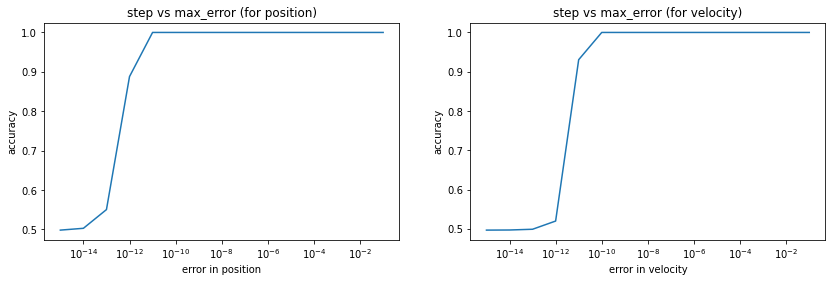

dt = 0.0002, number of steps = 5000.0


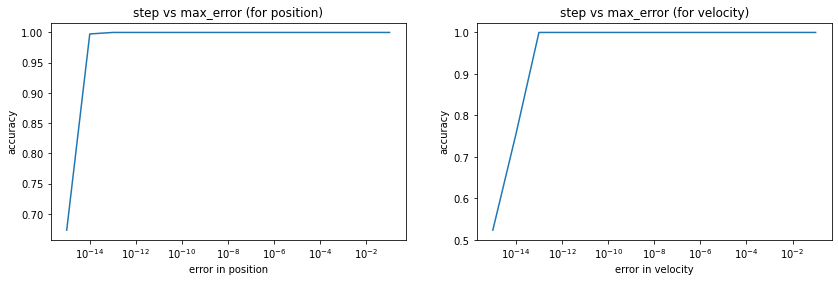

dt = 0.0001, number of steps = 10000.0


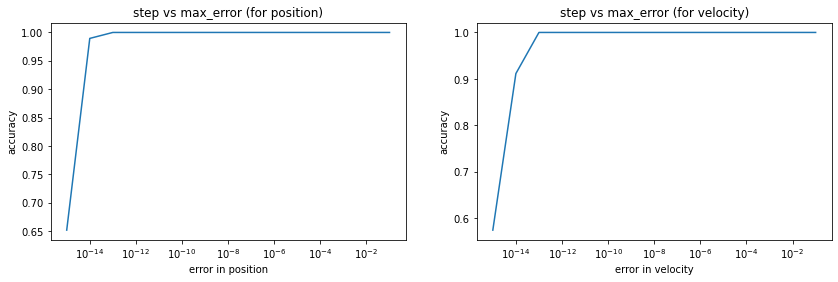

dt = 5e-05, number of steps = 20000.0


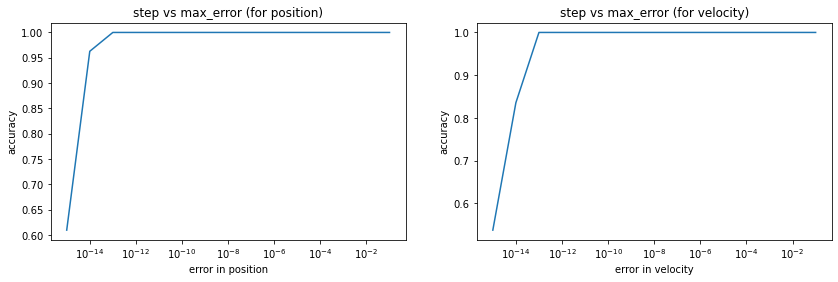

dt = 3.3333333333333335e-05, number of steps = 30000.0


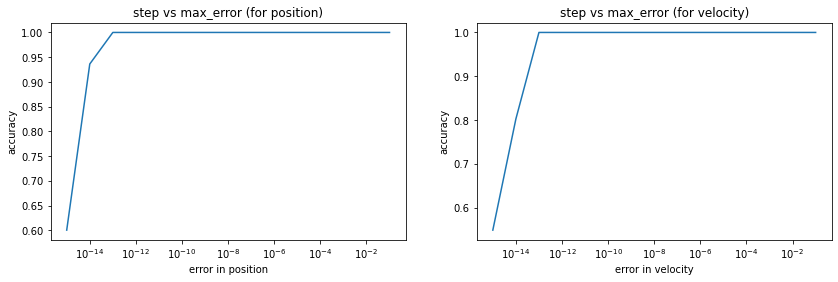

dt = 2.5e-05, number of steps = 40000.0


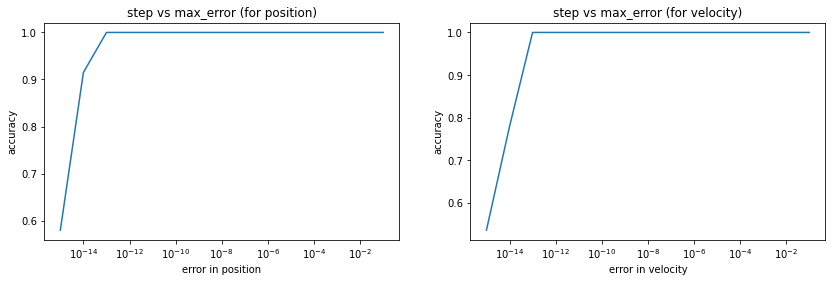

dt = 2e-05, number of steps = 49999.99999999999


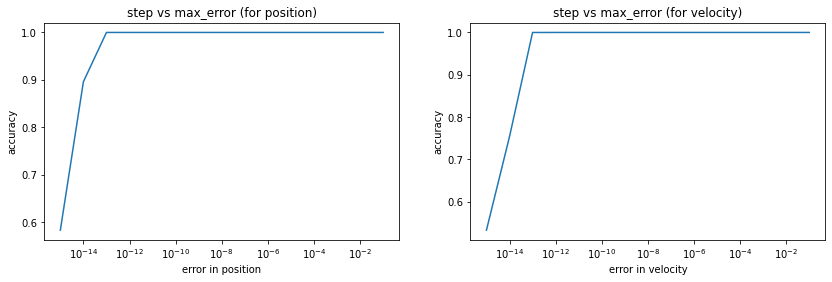

dt = 1.6666666666666667e-05, number of steps = 60000.0


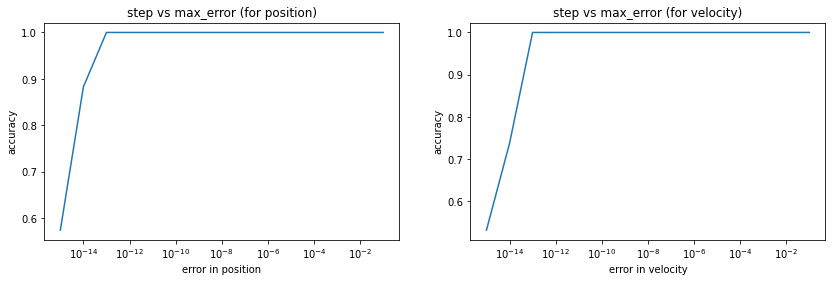

dt = 1.25e-05, number of steps = 80000.0


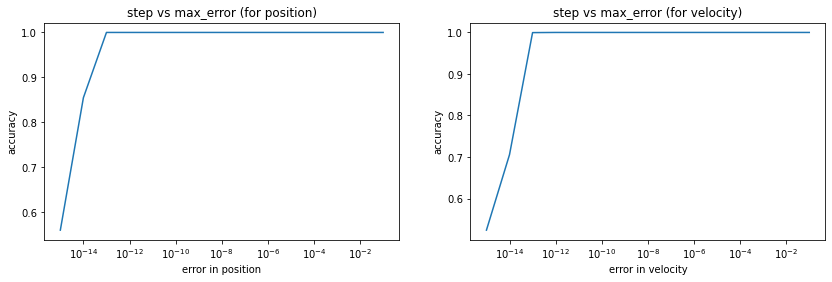

dt = 1.1111111111111112e-05, number of steps = 90000.0


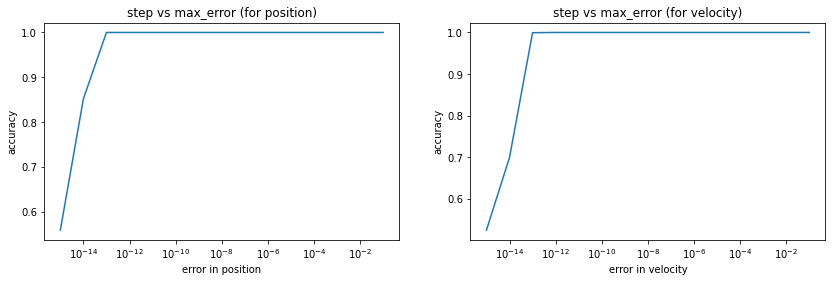

dt = 1e-05, number of steps = 99999.99999999999


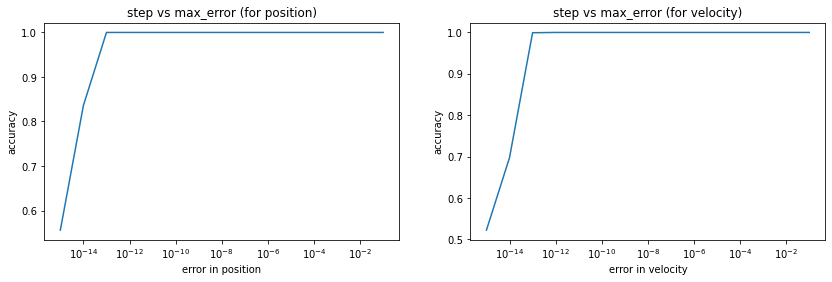

In [13]:
for x in dataArray:
    _dt = x[0]
    _errror_array = np.asarray(x[1])
    print(f"dt = {_dt}, number of steps = {1/_dt}")
    
    fig, ax = plt.subplots(1, 2, figsize=(14,4))
    ax[0].set_title("step vs max_error (for position)")
    ax[0].set_xscale("log")
    ax[0].set_xlabel("error in position")
    ax[0].set_ylabel("accuracy")
    ax[0].plot(_errror_array[:, 0], _errror_array[:, 1])

    ax[1].set_title("step vs max_error (for velocity)")
    ax[1].set_xscale("log")
    ax[1].set_xlabel("error in velocity")
    ax[1].set_ylabel("accuracy")

    ax[1].plot(_errror_array[:, 0], _errror_array[:, 2])
    plt.show()

In [8]:
1/100_000

1e-05

# (a2) energy test

In [210]:
def createEnergyPrecisionList(_dt):
    data = np.load(f"x_position_with_dt_{_dt}_(no_dapming_no_noise).npy")
    initial_state = data[0]
    final_state = data[1]
    
    initial_v = initial_state[:, :, 1]
    final_v = final_state[:, :, 1]
    
    initial_KE = 1/2 * initial_v**2
    final_KE   = 1/2 * final_v**2
    initial_PE = bfr.system.get_potential(initial_state, 0).reshape(-1, 1)
    final_PE   = bfr.system.get_potential(final_state, 0).reshape(-1, 1)
        
    inital_TE = initial_KE + initial_PE
    final_TE = final_KE + final_PE
    
    return final_TE - inital_TE



In [213]:
energy_difference = createEnergyPrecisionList(dt_list[0])

print(max(energy_difference))
print("The difference in energy_difference is very small")

[-1.56125113e-17]
The difference in energy_difference is very small


## (b) fidelity assessment

In [219]:
def createFidelityList(_dt):
    array = []
    data = np.load(f"x_position_with_dt_{_dt}_(no_dapming_no_noise).npy")
    initial_x_bit = np.sign(data[0][:, :, 0])
    final_x_bit = np.sign(data[1][:, :, 0])
    
    total_number_of_bit = len(initial_x_bit)
    bad_bits = np.sum(initial_x_bit == final_x_bit)
    good_bits = np.sum(initial_x_bit != final_x_bit)
    
    return (_dt, good_bits / total_number_of_bit)

fidelityDataArray = [createFidelityList(_dt) for _dt in dt_list]

In [220]:
fidelityDataArray

[(0.001, 1.0),
 (0.0002, 1.0),
 (0.0001, 1.0),
 (5e-05, 1.0),
 (3.3333333333333335e-05, 1.0),
 (2.5e-05, 1.0),
 (2e-05, 1.0),
 (1.6666666666666667e-05, 1.0),
 (1.25e-05, 1.0),
 (1.1111111111111112e-05, 1.0),
 (1e-05, 1.0)]

## (c) work done information

In [5]:
def createWorkDoneList(_dt):
    work_done = np.load(f"work_done_with_dt_{_dt}_(no_dapming_no_noise).npy")
    N = len(work_done)
    mean_work_done = np.mean(work_done)
    fluctuation = mean_work_done / np.sqrt(N)
    jarzynski_term = np.sum(np.exp(-work_done))/N
    return (_dt, mean_work_done, fluctuation, jarzynski_term)

In [6]:
# 0: dt, 1L mean_work_done, 2: fluctuation, 3: jarzynski_term)
workDoneDataArray = np.asarray([createWorkDoneList(_dt) for _dt in dt_list])
print(workDoneDataArray)

NameError: name 'dt_list' is not defined

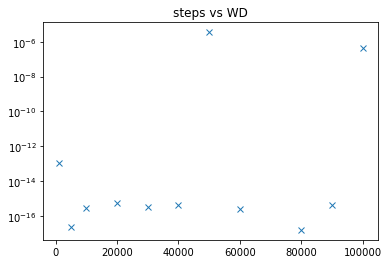

In [237]:
plt.title("steps vs WD")
plt.yscale("log")
plt.plot(1/workDoneDataArray[:, 0], np.abs(workDoneDataArray[:, 1]), "x")

# dt_sweep

In [8]:
sweepObject = {
    "lambda":   0,
    "N":        10_000,
    "dt":       [1/1_000, 1/5_000, 1/10_000, 1/50_000, 1/100_000],
#     "dt":       [1/500_000, 1/1_000_000],
    "k":        np.pi**2,
    "tau":      1,
    "depth":    1,
    "location": 1
}

parameter = "dt"
label = "dt_sweep"
heplerFunctionBitFlip.sweepFunction(sweepObject, bfr, label, save = True, jsonPath= jsonPath, txtPath= txtPath)

========== start (1/5) ==========
lambda_0_N_10000_dt_0.001_k_9.8696_tau_1_depth_1_location_1
- This set of parameter is already simulated.
- Nothing is saved.
- Skip to the next paramter.

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10129 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 100.0
meanFinalWork = -9.866311415130875e-14
========== finished (1/5) ==========
========== start (2/5) ==========
lambda_0_N_10000_dt_0.0002_k_9.8696_tau_1_depth_1_location_1

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10037 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 100.0
meanFinalWork = -4.461179457279859e-16
========== finished (2/5) ==========
========== start (3/5) ==========
lambda_0_N_10000_dt_0.0001_k_9.8696_tau_1_depth_1_location_1

 initializing...
the par

dt_sweep
parameters:  [0.001, 0.0002, 0.0001, 2e-05, 1e-05]
fidelity:  [100.0, 100.0, 100.0, 100.0, 100.0]
meanFinalWork:  [-9.866311415130875e-14, -4.461179457279859e-16, 5.691076337994977e-16, 6.519444854331414e-07, 3.6017400427308813e-07]


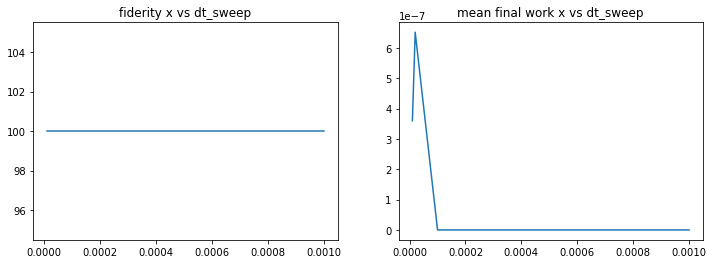

In [72]:

parameter = "dt"
label = "dt_sweep"
heplerFunctionBitFlip.sweepAnalysisFunction(parameter, label, jsonPath = jsonPath)



# k_sweep

In [128]:
%%notify
for k in np.linspace(1, 10, 9):
    sweepObject = {
        "lambda":   0,
        "N":        10_000,
        "dt":       1/50_000,
        "k":        [k],
        "tau":      np.pi/np.sqrt(k),
        "depth":    1,
        "location": 1

    }
    
    parameter = "k"
    label = "k_sweep"
    heplerFunctionBitFlip.sweepFunction(sweepObject, bfr, label, save = True, jsonPath= jsonPath, txtPath= txtPath)

========== start (1/1) ==========
lambda_0_N_10000_dt_2e-05_k_1_tau_3.1416_depth_1_location_1
- This set of parameter is already simulated.
- Nothing is saved.
- Skip to the next paramter.

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (1.0, 1.0)]
 found 10129 samples out of 10000
 running sim...

 analyzing output...


NameError: name 'bfr' is not defined

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

k_sweep
parameters:  []
fidelity:  []
meanFinalWork:  []


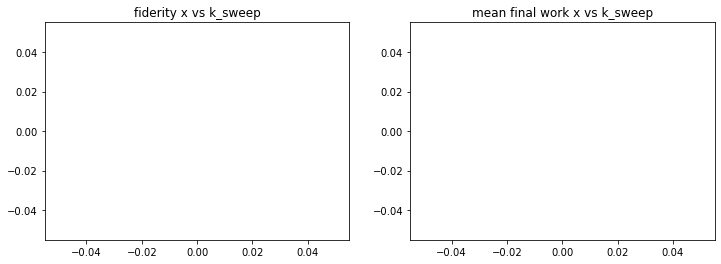

In [86]:
%notify
parameter = "k"
label = "k_sweep"
heplerFunctionBitFlip.sweepAnalysisFunction(parameter, label, jsonPath = jsonPath)


In [32]:
import notifypy
notification = notifypy.Notify()
notification.title = "Cool Title"
notification.message = "Even cooler message."
notification.send()

True

# tau_sweep

In [72]:
sweepObject = {
    "lambda":   0.5,
    "N":        10_000,
    "dt":       1/10_000,
    "k":        np.pi**2,
    "tau":      np.linspace(0.5, 5, 8),
    "depth":    1,
    "location": 1
}

# how long the protocol, relation between tau and k

parameter = "tau"
label = "tau_sweep"
heplerFunctionBitFlip.sweepFunction(sweepObject, bfr, label, save = True, jsonPath= jsonPath, txtPath= txtPath)

========== start (1/8) ==========
lambda_0.5_N_10000_dt_0.0001_k_9.8696_tau_0.5_depth_1_location_1

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10015 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 100.0
meanFinalWork = 1.6101772705455206
========== finished (1/8) ==========
========== start (2/8) ==========
lambda_0.5_N_10000_dt_0.0001_k_9.8696_tau_1.1429_depth_1_location_1

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10054 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 100.0
meanFinalWork = 1.591708286806516
========== finished (2/8) ==========
========== start (3/8) ==========
lambda_0.5_N_10000_dt_0.0001_k_9.8696_tau_1.7857_depth_1_location_1

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.

k_sweep
parameters:  [9.869604401089358, 20.972909352314886, 32.07621430354041, 43.17951925476594, 54.28282420599147, 65.386129157217, 76.48943410844252, 87.59273905966805, 98.69604401089359]
fidelity:  [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
meanFinalWork:  [-1.2395067135266164e-16, -2.051701644454561e-06, 5.5382978443963306e-08, 2.4651673115065058e-05, 7.254058308333744e-07, 1.6350870259827497e-06, 5.181511533852925e-06, -6.144556631049099e-06, 4.324640381588687e-05]


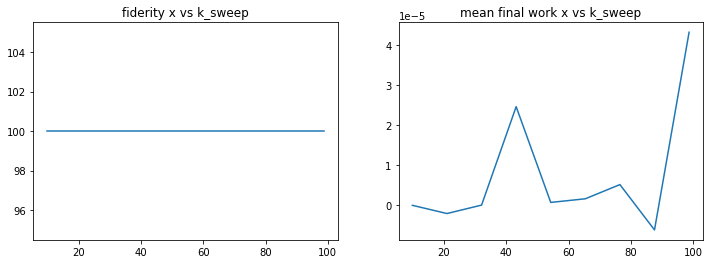

In [37]:
heplerFunctionBitFlip.sweepAnalysisFunction(parameter, label, jsonPath = jsonPath)

# depth sweep

In [65]:
heplerFunctionBitFlip = importlib.reload(heplerFunctionBitFlip)

sweepObject = {
    "lambda":   0,
    "N":        10_000,
    "dt":       1/10_000,
    "k":        np.pi**2,
    "tau":      1,
    "depth":    np.linspace(1, 4, 9),
    "location": 1
}

label = "depth_sweep"
heplerFunctionBitFlip.sweepFunction(sweepObject, bfr, label, save = True, jsonPath= jsonPath, txtPath= txtPath)

========== start (1/9) ==========
lambda_0_N_10000_dt_0.0001_k_9.8696_tau_1_depth_1_location_1
- This set of parameter is already simulated.
- Nothing is saved.
- Skip to the next paramter.

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10164 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 100.0
meanFinalWork = 5.954147909103765e-17
========== finished (1/9) ==========
========== start (2/9) ==========
lambda_0_N_10000_dt_0.0001_k_9.8696_tau_1_depth_1.375_location_1

 initializing...
the parameters:  [(1.375, 1.375), (-5.5, -5.5)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10004 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 100.0
meanFinalWork = -7.081716263736584e-16
========== finished (2/9) ==========
========== start (3/9) ==========
lambda_0_N_10000_dt_0.0001_k_9.8696_tau_1_depth_1.75_location_1

 initializing

depth_sweep
parameters:  [1.0, 1.375, 1.75, 2.125, 2.5, 2.875, 3.25, 3.625, 4.0]
fidelity:  [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
meanFinalWork:  [5.954147909103765e-17, -7.081716263736584e-16, 6.784473523755609e-17, -3.845428162103375e-17, 2.82743815509343e-16, 1.0070722078118045e-17, -6.1476109965863e-17, 5.028688376080767e-17, -1.522775795162381e-16]


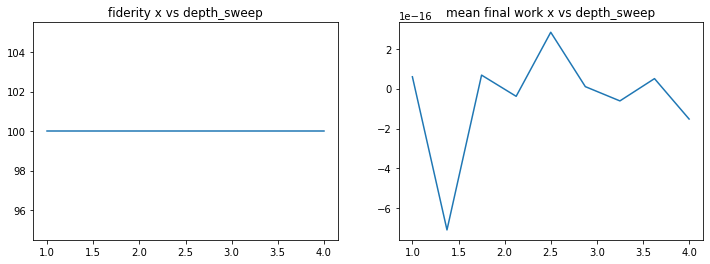

In [67]:
parameter = "depth"
label = "depth_sweep"

heplerFunctionBitFlip.sweepAnalysisFunction(parameter, label, jsonPath = jsonPath)

# location sweep

In [68]:
heplerFunctionBitFlip = importlib.reload(heplerFunctionBitFlip)

sweepObject = {
    "lambda":   0,
    "N":        10_000,
    "dt":       1/10_000,
    "k":        np.pi**2,
    "tau":      1,
    "depth":    1,
    "location": np.linspace(1, 3, 9)
    
}

parameter = "location"
label = "location_sweep"
heplerFunctionBitFlip.sweepFunction(sweepObject, bfr, label, save = True, jsonPath= jsonPath, txtPath= txtPath)

========== start (1/9) ==========
lambda_0_N_10000_dt_0.0001_k_9.8696_tau_1_depth_1_location_1
- This set of parameter is already simulated.
- Nothing is saved.
- Skip to the next paramter.

 initializing...
the parameters:  [(1.0, 1.0), (-4.0, -4.0)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10001 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 100.0
meanFinalWork = 9.979158590496211e-17
========== finished (1/9) ==========
========== start (2/9) ==========
lambda_0_N_10000_dt_0.0001_k_9.8696_tau_1_depth_1_location_1.25

 initializing...
the parameters:  [(0.4096, 0.4096), (-2.56, -2.56)]
the parameters:  [(0, 0), (9.869604401089358, 9.869604401089358)]
 found 10087 samples out of 10000
 running sim...

 analyzing output...
fidelity_rate = 100.0
meanFinalWork = -4.899235494644347e-16
========== finished (2/9) ==========
========== start (3/9) ==========
lambda_0_N_10000_dt_0.0001_k_9.8696_tau_1_depth_1_location_1.5

 initializi

location_sweep
parameters:  [1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0]
fidelity:  [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
meanFinalWork:  [9.979158590496211e-17, -4.899235494644347e-16, 1.2290066568961388e-15, -9.085716264957737e-17, -4.731245411023882e-16, 1.140426331434866e-15, -3.141601930741029e-16, -9.073369136993692e-16, 4.595446272601697e-16]


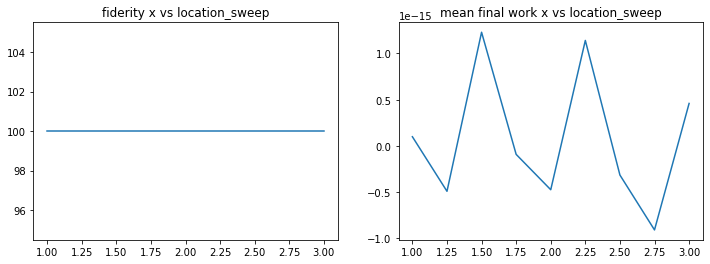

In [69]:
heplerFunctionBitFlip.sweepAnalysisFunction(parameter, label, jsonPath = jsonPath)

In [660]:
%%time
bfr.run_sim(verbose=True)


 initializing...
 found 5001 samples out of 5000
 running sim...

 analyzing output...
CPU times: user 549 ms, sys: 68.4 ms, total: 617 ms
Wall time: 708 ms


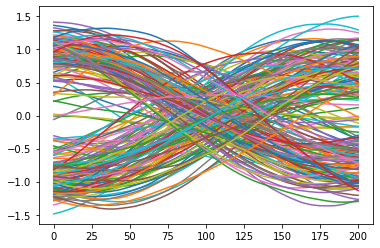

In [662]:
#here is a quick trajectory trace
allstate = bfr.sim.output.all_state['states']
plt.plot(allstate[:,:,0,0].transpose());

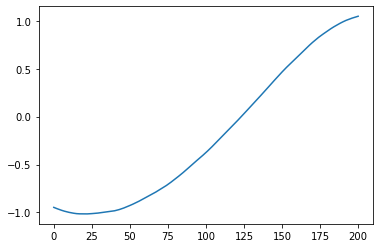

In [670]:
plt.plot(allstate[0,:,0,0]);

In [ ]:
def setup_sim(system, init_state, procedures=None, sim_params=None, dt=1/200, damping=1, temp=1, extra_time=1):
    print(f" system: {system},\n init_state: {init_state},\n procedures: {procedures},\n " +
          f"sim_params: {sim_params},\n dt: {dt},\n damping: {damping},\n" +
          f" temp: {temp},\n extra_time: {extra_time}")
    
sim_kwargs = {'damping': "damping",
          'temp': "T", 
          'dt':"dt", 
          'procedures':"proceudures",
          'sim_params': [1, 1, 0]
         }

setup_sim("system", "init_state", **sim_kwargs)